# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [3]:
import numpy as np
tab0=np.ones((30,30),dtype='uint8')*255

from skimage import io
io.imshow(tab0)

ModuleNotFoundError: No module named 'skimage'

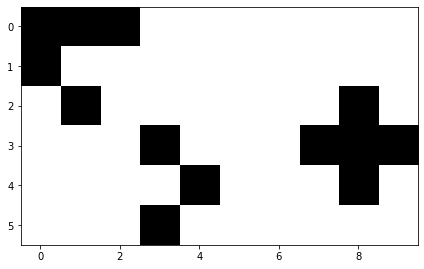

In [ ]:
depart=np.array([[0,0,0,255,255,255,255,255,255,255],
                 [0,255,255,255,255,255,255,255,255,255],
                 [255,0,255,255,255,255,255,255,0,255],
                 [255,255,255,0,255,255,255,0,0,0],
                 [255,255,255,255,0,255,255,255,0,255],
                 [255,255,255,0,255,255,255,255,255,255]],dtype='uint8')
from skimage import io
io.imshow(depart,cmap='gray')

In [ ]:
w1 = (tab0.shape[0] - depart.shape[0]) // 2
w2 = w1 + depart.shape[0]
h1 = (tab0.shape[1] - depart.shape[1]) // 2
h2 = h1 + depart.shape[1]

tab0[w1:w2,h1:h2] = depart
tab0 = np.array(tab0)

In [ ]:
def voisin(tpl, tab):
    returning = []
    if tpl[0] > 0:
        if tab[tpl[0]-1][tpl[1]] == 0:
            returning.append((tpl[0]-1, tpl[1])) #haut
    if tpl[0] <= tab.shape[0] - 2:
        if tab[tpl[0]+1][tpl[1]] == 0:
            returning.append((tpl[0]+1, tpl[1])) #bas
    if tpl[1] > 0:
        if tab[tpl[0]][tpl[1]-1] == 0:
            returning.append((tpl[0], tpl[1]-1)) #gauche
    if tpl[1] <= tab.shape[1] - 2:
        if tab[tpl[0]][tpl[1]+1] == 0:
            returning.append((tpl[0], tpl[1]+1)) #droite

    if tpl[0] > 0 and tpl[1] > 0:
        if tab[tpl[0]-1][tpl[1]-1] == 0:
            returning.append((tpl[0]-1, tpl[1]-1)) #diagonalde haut gauche
    if tpl[0] <= tab.shape[0] - 2 and tpl[1] > 0:
        if tab[tpl[0]+1][tpl[1]-1] == 0:
            returning.append((tpl[0]+1, tpl[1]-1)) #diagonalde bas gauche
    if tpl[0] > 0 and tpl[1] <= tab.shape[1] - 2:
        if tab[tpl[0]-1][tpl[1]+1] == 0:
            returning.append((tpl[0]-1, tpl[1]+1)) #diagonalde haut droit
    if tpl[0] <= tab.shape[0] - 2 and tpl[1] <= tab.shape[1] - 2:
        if tab[tpl[0]+1][tpl[1]+1] == 0:
            returning.append((tpl[0]+1, tpl[1]+1)) #diagonalde bas droite

    return returning
# voisin((15,18), tab0)

In [ ]:
def nombre(tpl, tab):
    return len(voisin(tpl, tab))
# nombre((15,18), tab0)

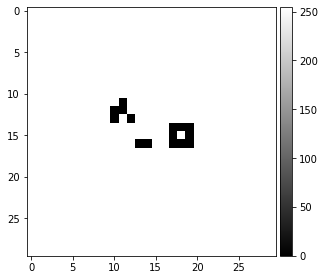

In [ ]:
def iteration(tab):
    newtab = np.array(tab.tolist())
    for y in range(len(tab)):
        for x in range(len(tab[y])):
            alive = tab[y][x] == 0
            nb = nombre((y, x), tab)
            if alive:
                if nb == 2 or nb == 3:
                    newtab[y][x] = 0
                else:
                    newtab[y][x] = 255
            elif not alive:
                if nb == 3:
                    newtab[y][x] = 0
    return newtab
# tab0 = np.array(iteration(tab0))
# io.imshow(tab0)
io.imshow(iteration(tab0),cmap='gray')
# print(iteration(tab0))
